In [52]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split,learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Charger les données
df = pd.read_csv("voitures.csv")


# Séparer les features et la variable cible
X = df.drop(["prix"], axis=1)
y = df["prix"]

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifier les colonnes catégorielles et numériques
cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(include=["int", "float"]).columns.tolist()

# Créer les transformateurs pour les colonnes catégorielles et numériques
cat_transformer = Pipeline(steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))])
num_transformer = Pipeline(steps=[("scaler", StandardScaler()), ("poly", PolynomialFeatures(degree=2, include_bias=False))])

# Créer le ColumnTransformer pour appliquer les transformateurs aux colonnes correspondantes
preprocessor = ColumnTransformer(transformers=[("cat", cat_transformer, cat_cols), ("num", num_transformer, num_cols)])

# Créer le pipeline complet avec la régularisation Ridge
model = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", Ridge(alpha=1.0))])

# Entraîner le pipeline sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Évaluer les performances du pipeline sur l'ensemble de test
score = model.score(X_test, y_test)
print("Score:", score)


Score: 0.9132855727949925


In [54]:
import joblib

joblib.dump(model, 'Price_Reg_Model.joblib')


['Price_Reg_Model.joblib']

In [53]:
new_car = pd.DataFrame({
    "car_ID": [1],
    "etat_de_route": [3],
    "carburant": ["gas"],
    "turbo": ["standard"],
    "nombre_portes": [2],
    "type_vehicule": ["decapotable"],
    "roues_motrices": ["arriere"],
    "emplacement_moteur": ["devant"],
    "empattement": [2.25],
    "longueur_voiture": [4.29],
    "largeur_voiture": [1.63],
    "hauteur_voiture": [1.24],
    "poids_vehicule": [1.27],
    "type_moteur": ["ACT"],
    "nombre_cylindres": [4],
    "taille_moteur": [34904],
    "systeme_carburant": ["carburateur 2 corps"],
    "taux_alésage": [3.47],
    "course": [2.68],
    "taux_compression": [9],
    "chevaux": [111],
    "tour_moteur": [5000],
    "consommation_ville": [21],
    "consommation_autoroute": [27],
    "marque": ["audi"],
    "modele": ["fox"],
    
})
price = model.predict(new_car)
print("Prix prédit:", price.round(2))

Prix prédit: [15875.8]


In [45]:
df.columns

Index(['car_ID', 'etat_de_route', 'carburant', 'turbo', 'nombre_portes',
       'type_vehicule', 'roues_motrices', 'emplacement_moteur', 'empattement',
       'longueur_voiture', 'largeur_voiture', 'hauteur_voiture',
       'poids_vehicule', 'type_moteur', 'nombre_cylindres', 'taille_moteur',
       'systeme_carburant', 'taux_alésage', 'course', 'taux_compression',
       'chevaux', 'tour_moteur', 'consommation_ville',
       'consommation_autoroute', 'prix', 'marque', 'modele'],
      dtype='object')

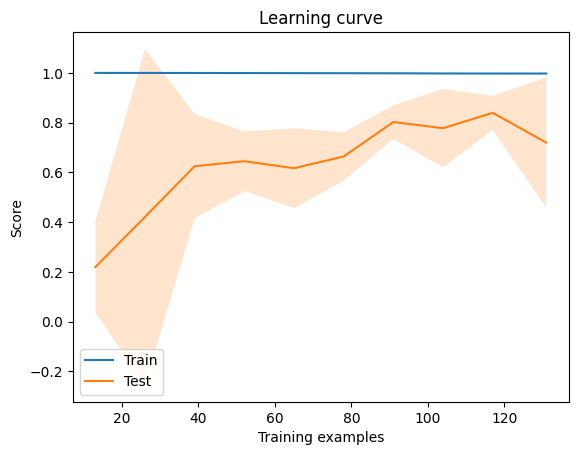

In [44]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.model_selection import learning_curve

# train_sizes, train_scores, test_scores = learning_curve(
#     estimator=model, X=X_train, y=y_train, cv=5, n_jobs=-1,
#     train_sizes=np.linspace(0.1, 1.0, 10), scoring="r2")

# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)

# plt.plot(train_sizes, train_mean, label="Train")
# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
# plt.plot(train_sizes, test_mean, label="Test")
# plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.xlabel("Training examples")
# plt.ylabel("Score")
# plt.title("Learning curve")
# plt.legend(loc="best")
# # plt.savefig('Learning_Curve.png')
# plt.show()


In [40]:
# df.columns

In [39]:
# correlations = df.corr()['prix']
# print(correlations)